In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_excel('train.xlsx')

In [3]:
raw_data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,train_2996,0,12.7906,-6.6952,8.9214,8.7456,9.7838,-13.3113,5.9395,17.1793,...,12.4624,8.6757,1.8539,1.8595,20.0964,-1.8607,3.6957,7.1619,10.8426,-12.2040
2997,train_2997,0,7.8752,-6.6599,10.2925,8.3582,12.8487,-13.6883,4.5218,13.4695,...,2.8302,6.0452,2.3434,0.8373,18.2609,0.3159,-1.5047,8.3811,21.1464,0.5044
2998,train_2998,0,12.4543,0.5636,7.6201,6.5594,11.9902,-1.0181,5.9425,18.9612,...,8.5948,9.8214,3.3406,4.6509,14.6915,-2.3242,-4.4507,9.7024,19.4117,14.7711
2999,train_2999,0,8.3127,6.3142,8.4590,9.7534,11.9035,5.0464,5.6587,21.5793,...,-3.1613,8.2801,0.4287,2.7820,18.7185,-1.3488,8.9783,8.3284,15.5289,-7.8532


# Missing Value Analysis

In [4]:
raw_data.isna().sum().sum()

0

There are no Missing values.

In [5]:
raw_data['ID_code'] = raw_data['ID_code'].astype('object')
raw_data['target'] = raw_data['target'].astype('category')
raw_data.iloc[:, 2:] = raw_data.iloc[:, 2:].astype('float')

# Outlier Analysis

In [6]:
columns = list(raw_data.columns)
var_cols = raw_data._get_numeric_data().columns

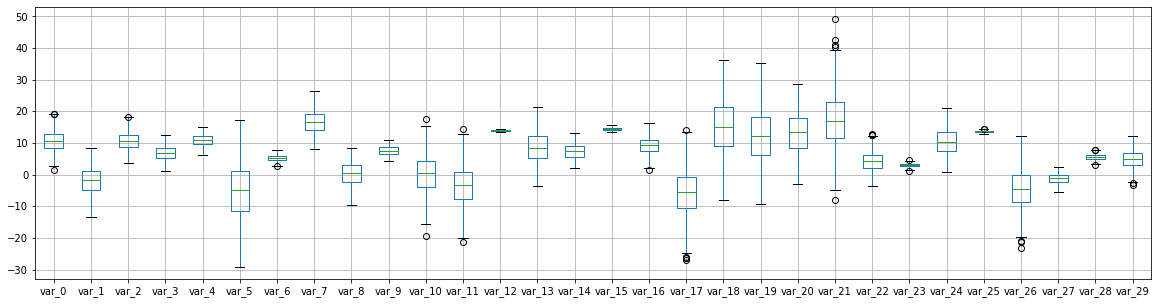

In [7]:
raw_data[var_cols[0:30]].boxplot(figsize = (20, 5))

#### Removing outliers using box plot method

In [8]:
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 # Inter Quartile Range
    
    filter = (df[column] >= (Q1 - 1.5 * IQR)) & ((df[column] <= (Q3 + 1.5 * IQR)))
    noOfOutliers = df.shape[0] - df.loc[filter].shape[0]
    return noOfOutliers, df.loc[filter]

In [9]:
data1 = raw_data.copy()
for col in var_cols:
    NoOfOutliers, data1 = removeOutliers(data1, col)
    print('Column: ', col.upper(), ' --> Number of Outliers:', NoOfOutliers)
    print('-----------------------------------------------------------------')
print('Final Data Shape: ', data1.shape)
data1.reset_index(inplace=True, drop=True)

Column:  VAR_0  --> Number of Outliers: 3
-----------------------------------------------------------------
Column:  VAR_1  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_2  --> Number of Outliers: 1
-----------------------------------------------------------------
Column:  VAR_3  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_4  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_5  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_6  --> Number of Outliers: 2
-----------------------------------------------------------------
Column:  VAR_7  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_8  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_9  --> Number o

Column:  VAR_81  --> Number of Outliers: 2
-----------------------------------------------------------------
Column:  VAR_82  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_83  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_84  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_85  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_86  --> Number of Outliers: 4
-----------------------------------------------------------------
Column:  VAR_87  --> Number of Outliers: 3
-----------------------------------------------------------------
Column:  VAR_88  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_89  --> Number of Outliers: 4
-----------------------------------------------------------------
Column:  VAR_90  --

Column:  VAR_156  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_157  --> Number of Outliers: 2
-----------------------------------------------------------------
Column:  VAR_158  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_159  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_160  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_161  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_162  --> Number of Outliers: 3
-----------------------------------------------------------------
Column:  VAR_163  --> Number of Outliers: 1
-----------------------------------------------------------------
Column:  VAR_164  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  V

Therefore, when we use boxplot method to remove outliers, we are loosing (3001-2630 = ) 371 rows.

#### Removing outliers using zscore

In [10]:
from scipy import stats
z_scores = stats.zscore(raw_data[var_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data2 = raw_data[filtered_entries]
data2.reset_index(drop=True, inplace=True)
data2.shape

(2848, 202)

Therefore, when we use zscore method to remove outliers, we are loosing (3001-2848 = ) 153 rows.

In [11]:
data = data1.copy()

# Feature Selection

#### Using Correlation Matrix

In [12]:
correlation_matrix = pd.DataFrame(data.corr())

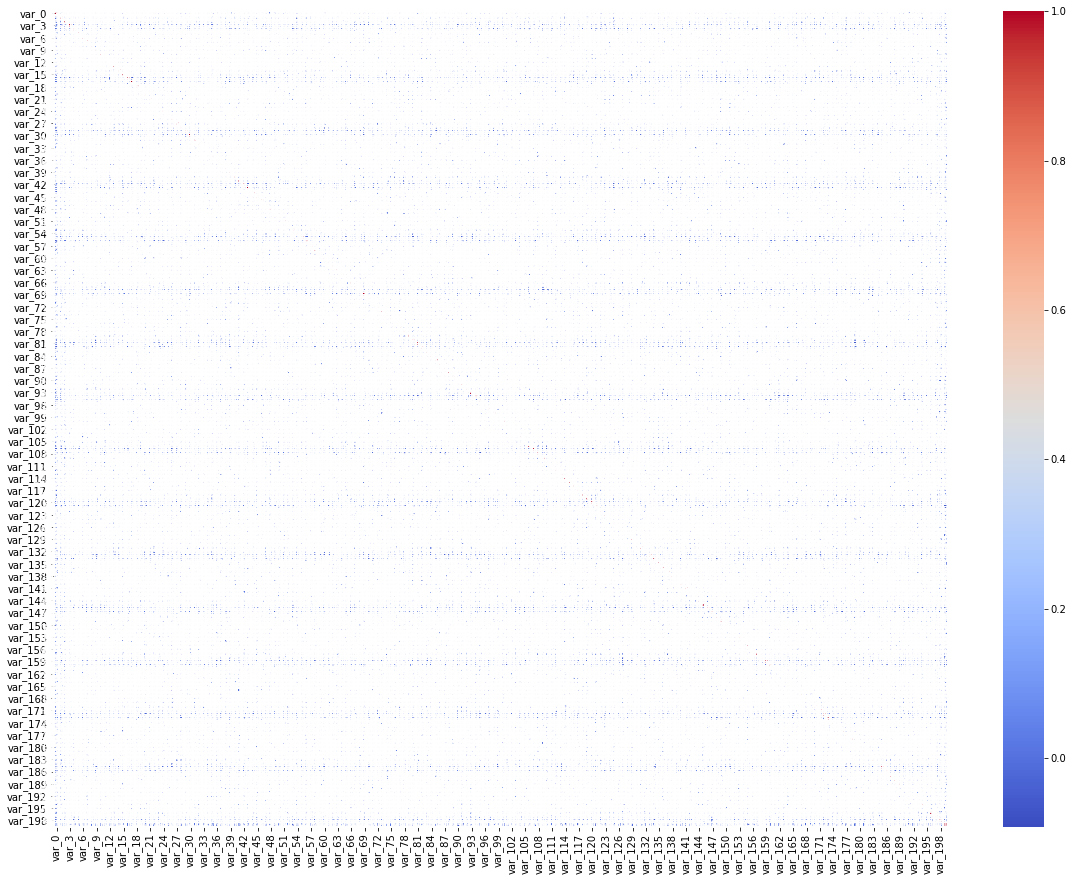

In [13]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='w', annot=True)
plt.show()

In [14]:
correlation_matrix

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.019757,-0.024070,0.020183,-0.010170,0.009766,-0.039717,-0.001930,-0.004505,-0.021595,...,-0.022736,-0.026156,0.006392,-0.010749,-0.015254,-0.036841,-0.008754,-0.011956,-0.014299,0.002778
var_1,-0.019757,1.000000,0.028053,-0.015852,0.033457,-0.007136,0.003729,0.040351,0.002760,-0.044567,...,0.003151,-0.008896,-0.009004,0.011987,-0.033699,0.038405,0.006289,0.011044,0.003228,0.012111
var_2,-0.024070,0.028053,1.000000,-0.021352,0.001414,0.017001,0.003539,-0.026150,0.028976,-0.010432,...,-0.033440,0.016626,0.011876,0.034417,-0.007082,0.004183,-0.021327,-0.005406,0.046586,0.043639
var_3,0.020183,-0.015852,-0.021352,1.000000,0.035644,-0.031735,0.001312,0.035411,0.007772,-0.000638,...,-0.000674,-0.000268,0.014132,-0.022834,-0.004672,0.004324,0.019294,-0.012327,-0.015150,0.010152
var_4,-0.010170,0.033457,0.001414,0.035644,1.000000,0.002528,0.017527,0.021849,0.038519,0.020865,...,-0.010476,0.026255,0.004132,0.001014,0.020378,0.034472,-0.018032,-0.005645,-0.022508,-0.031430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,-0.036841,0.038405,0.004183,0.004324,0.034472,-0.008901,-0.031949,-0.008899,0.009706,-0.029364,...,0.009269,-0.006669,-0.027888,0.004229,-0.014542,1.000000,0.000011,-0.005412,-0.009095,-0.001678
var_196,-0.008754,0.006289,-0.021327,0.019294,-0.018032,0.016203,0.027874,0.000107,-0.013461,-0.003584,...,-0.017306,0.001268,-0.022208,-0.006719,-0.025596,0.000011,1.000000,-0.028254,-0.000325,-0.019593
var_197,-0.011956,0.011044,-0.005406,-0.012327,-0.005645,-0.002316,-0.000246,0.002449,0.027941,0.011347,...,-0.004046,-0.018117,-0.015029,-0.003890,-0.011202,-0.005412,-0.028254,1.000000,-0.029661,0.010057
var_198,-0.014299,0.003228,0.046586,-0.015150,-0.022508,-0.002039,0.015791,-0.010322,0.007151,0.019115,...,-0.022339,0.056100,0.010772,0.028912,0.031051,-0.009095,-0.000325,-0.029661,1.000000,0.003047


In [15]:
# Display pair of columns having correlation greater than 0.70

row = list(correlation_matrix.index)
col = list(correlation_matrix.columns)
corr_mark = 0.75
atleastOne = 0
l = []
for r in row:
    for c in col:
        if r != c:
            if [c, r] not in l:
                if correlation_matrix[r][c] > corr_mark:
                    atleastOne = 1
                    l.append([r, c])
                    print(r, ' - ', c, '  --> ', correlation_matrix[r][c])
                else:
                    continue
            else:
                continue
        else:
            continue
if atleastOne == 0:
    print('NONE of the columns have Correlation greater than', corr_mark)

NONE of the columns have Correlation greater than 0.75


# Feature Scaling

Since all the values are in the similar range, we don't do the feature scaling.

# Model Development

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data[var_cols]
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2104, 200) (526, 200) (2104,) (526,)


## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
Logistic_reg = LogisticRegression()
Logistic_reg.fit(X_train, Y_train)
print('Training Accuracy: ', Logistic_reg.score(X_train, Y_train))
print('Testing Accuracy: ', Logistic_reg.score(X_test, Y_test))

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy:  0.9310836501901141
Testing Accuracy:  0.870722433460076


## Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# NB_clf = MultinomialNB()
# NB_clf.fit(X_train, Y_train)
# print('Training Accuracy: ', NB_clf.score(X_train, Y_train))
# print('Testing Accuracy: ', NB_clf.score(X_test, Y_test))

In [20]:
GNB_clf = GaussianNB()
GNB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', GNB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', GNB_clf.score(X_test, Y_test))

Training Accuracy:  0.9401140684410646
Testing Accuracy:  0.908745247148289


In [21]:
BNB_clf = BernoulliNB()
BNB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', BNB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', BNB_clf.score(X_test, Y_test))

Training Accuracy:  0.9006653992395437
Testing Accuracy:  0.8897338403041825


## K-Neighbours Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

KN_clf = KNeighborsClassifier()
KN_clf.fit(X_train, Y_train)
print('Training Accuracy: ', KN_clf.score(X_train, Y_train))
print('Testing Accuracy: ', KN_clf.score(X_test, Y_test))

Training Accuracy:  0.903041825095057
Testing Accuracy:  0.903041825095057


## SVM

In [23]:
from sklearn import svm

SVM_clf = svm.SVC()
SVM_clf.fit(X_train, Y_train)
print('Training Accuracy: ', SVM_clf.score(X_train, Y_train))
print('Testing Accuracy: ', SVM_clf.score(X_test, Y_test))

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training Accuracy:  1.0
Testing Accuracy:  0.903041825095057


## Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, Y_train)
print('Training Accuracy: ', DT_clf.score(X_train, Y_train))
print('Testing Accuracy: ', DT_clf.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.8422053231939164


## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, Y_train)
print('Training Accuracy: ', RF_clf.score(X_train, Y_train))
print('Testing Accuracy: ', RF_clf.score(X_test, Y_test))

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy:  0.9824144486692015
Testing Accuracy:  0.903041825095057


In [26]:
ET_clf = ExtraTreesClassifier()
ET_clf.fit(X_train, Y_train)
print('Training Accuracy: ', ET_clf.score(X_train, Y_train))
print('Testing Accuracy: ', ET_clf.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.903041825095057


C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
AB_clf = AdaBoostClassifier()
AB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', AB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', AB_clf.score(X_test, Y_test))

Training Accuracy:  0.9258555133079848
Testing Accuracy:  0.8821292775665399


In [28]:
GB_clf = GradientBoostingClassifier()
GB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', GB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', GB_clf.score(X_test, Y_test))

Training Accuracy:  0.9629277566539924
Testing Accuracy:  0.9011406844106464


# DONE